請用以下的變項（Hour 、Temperature Humidity(%) 、Wind speed (m/s)、 Visibility (10m) 、Dew point temperature Solar Radiation (MJ/m2) 、Rainfall(mm) 、Snowfall (cm) ）預測腳踏車租用次數（Rented Bike Count），並撰寫出回歸方程式？

請問哪一個季節（春、夏、秋、冬）的腳踏車租用次數最高？請繪製直方圖。

不同季節（春、夏、秋、冬）的腳踏車租用次數是否有顯著差異？請繪製變異數分析摘要表。

請繪製不同時間腳踏車租用次數（Rented Bike Count）的趨勢圖？

請使用以下的變項繪製熱力圖（Hour Temperature Humidity(%) 、Wind speed (m/s)、 Visibility (10m) 、Dew point temperature ，並標示相關係數。

In [15]:
# 一
import pandas as pd
import statsmodels.api as sm

# 讀取數據文件
data = pd.read_csv('SeoulBikeData.csv')

# 提取所需變數
variables = ['Hour', 'Temperature', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
            'Dew point temperature', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


subset_data = data[variables]
subset_data = sm.add_constant(subset_data) # 添加常數項

# 建立線性迴歸模型
model = sm.OLS(data['Rented Bike Count'], subset_data)

# 建立模型擬合
results = model.fit()

# 顯示迴歸方程式
print('迴歸方程式：')
print(results.summary())

迴歸方程式：
                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     864.1
Date:                Mon, 15 May 2023   Prob (F-statistic):               0.00
Time:                        14:43:45   Log-Likelihood:                -66315.
No. Observations:                8760   AIC:                         1.326e+05
Df Residuals:                    8750   BIC:                         1.327e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const              

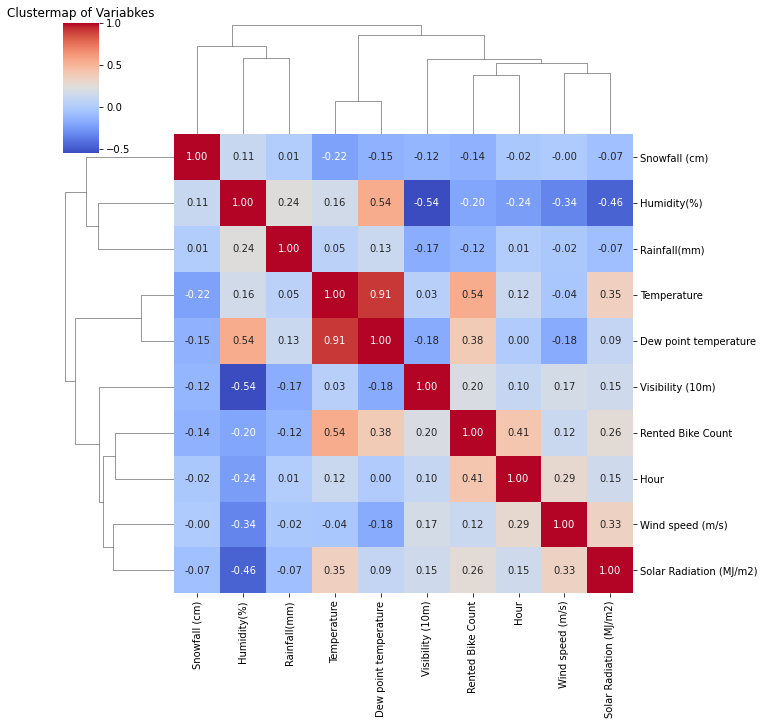

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 讀取數據文件
data = pd.read_csv('SeoulBikeData.csv')

# 提取所需變數
variables = ["Rented Bike Count", "Hour", "Temperature", "Humidity(%)",
             "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature",
            "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)"]

subset_data = data[variables]

# 計算變數間的關聯性
correlation_matrix = subset_data.corr()

# 繪製 clustermap
sns.clustermap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')

# 設定圖形標題
plt.title('Clustermap of Variabkes')

# 顯示圖形
plt.show()

# 項目分析

In [4]:
# 項目分析的概念與執行

import pandas as pd
df = pd.read_csv('python2011nsc.csv')
print(df.columns)

Index(['NO', 'Gender', 'DateOfBirth', 'Race', 'FaEdu', 'MomEdu', 'FaexpEdu',
       'CoexpEdu', 'Income', 'Grade', 'Level', 'Sportyear', 'ExpectEdu', 'a1',
       'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6',
       'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'pl', 'al',
       'ss', 'tr', 'blue', 'achievement', 'alienance'],
      dtype='object')


In [5]:
a_sum = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']
df['at'] = df[a_sum].sum(axis = 'columns')
df['mat'] = df['at'] / 7
df['mat'].describe()

count    530.000000
mean       3.549865
std        0.506504
min        1.714286
25%        3.178571
50%        3.571429
75%        3.857143
max        5.000000
Name: mat, dtype: float64

In [6]:
# 建立高低分組變數
df.loc[df.mat > 3.8571, 'matHL'] = 'matH'
df.loc[df.mat < 3.1785, 'matHL'] = 'matL'
print(df['matHL'].value_counts())
print('===')
print(df['matHL'])

matH    176
matL    133
Name: matHL, dtype: int64
===
0      matL
1       NaN
2       NaN
3      matL
4      matH
       ... 
525    matL
526    matH
527    matH
528    matH
529    matH
Name: matHL, Length: 530, dtype: object


In [7]:
# 執行項目分析的鑑別度
import scipy.stats as stats
group1 = df['a1'][df['matHL'] == 'matH']
group2 = df['a1'][df['matHL'] == 'matL']
stats.ttest_ind(group1, group2)
# pvalue < .05 顯著

Ttest_indResult(statistic=16.316339024573516, pvalue=1.570458627376885e-43)

In [9]:
# 執行多題目項目分析鑑別度

import scipy.stats as stats

a1_1 = df['a1'][df['matHL'] == 'matH']
a1_2 = df['a1'][df['matHL'] == 'matL']
print('a1:', stats.ttest_ind(a1_1, a1_2))
a2_1 = df['a2'][df['matHL'] == 'matH']
a2_2 = df['a2'][df['matHL'] == 'matL']
print('a2:', stats.ttest_ind(a2_1, a2_2))
a3_1 = df['a3'][df['matHL'] == 'matH']
a3_2 = df['a3'][df['matHL'] == 'matL']
print('a3:', stats.ttest_ind(a3_1, a3_2))
a4_1 = df['a4'][df['matHL'] == 'matH']
a4_2 = df['a4'][df['matHL'] == 'matL']
print('a4:', stats.ttest_ind(a4_1, a4_2))
a5_1 = df['a5'][df['matHL'] == 'matH']
a5_2 = df['a5'][df['matHL'] == 'matL']
print('a5:', stats.ttest_ind(a5_1, a5_2))
a6_1 = df['a6'][df['matHL'] == 'matH']
a6_2 = df['a6'][df['matHL'] == 'matL']
print('a6:', stats.ttest_ind(a6_1, a6_2))
a7_1 = df['a7'][df['matHL'] == 'matH']
a7_2 = df['a7'][df['matHL'] == 'matL']
print('a7:', stats.ttest_ind(a7_1, a7_2))

a1: Ttest_indResult(statistic=16.316339024573516, pvalue=1.570458627376885e-43)
a2: Ttest_indResult(statistic=13.622080473959553, pvalue=2.2429805342349368e-33)
a3: Ttest_indResult(statistic=15.344362770909544, pvalue=7.745047598560892e-40)
a4: Ttest_indResult(statistic=11.224635007256758, pvalue=9.971003776809036e-25)
a5: Ttest_indResult(statistic=13.11918606336424, pvalue=1.6082955041277813e-31)
a6: Ttest_indResult(statistic=16.362805056182292, pvalue=1.0447554887481638e-43)
a7: Ttest_indResult(statistic=8.197106546191176, pvalue=6.7661077481949965e-15)


# 信度分析

In [10]:
# 信度分析執行

import pandas as pd
df = pd.read_csv('python2011nsc.csv')
print(df.columns)

Index(['NO', 'Gender', 'DateOfBirth', 'Race', 'FaEdu', 'MomEdu', 'FaexpEdu',
       'CoexpEdu', 'Income', 'Grade', 'Level', 'Sportyear', 'ExpectEdu', 'a1',
       'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6',
       'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'pl', 'al',
       'ss', 'tr', 'blue', 'achievement', 'alienance'],
      dtype='object')


In [12]:
import pingouin as pg
cronbach1 = df[['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']]
pg.cronbach_alpha(cronbach1)

(0.6643822505197011, array([0.619, 0.706]))

In [13]:
# 對於分量表的Cronbach’s Alpha信度進行檢定。
cronbach11 =df[['a1', 'a2', 'a3']]
cronbach12 =df[['a4', 'a5', 'a6', 'a7']]
cb11 = pg.cronbach_alpha(cronbach11)
cb12 = pg.cronbach_alpha(cronbach12)
print(cb11)
print(cb12)

(0.5889485878517897, array([0.524, 0.646]))
(0.5872617738762133, array([0.527, 0.642]))


# 教育大數據資料

In [22]:
import pandas as pd
df = pd.read_csv('edu_bigdata_imp1.csv', encoding = 'ANSI')
df

C:\Users\happy\AppData\Local\Temp\ipykernel_5288\1298677662.py:2: DtypeWarning: Columns (16,29,30,31,32,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('edu_bigdata_imp1.csv', encoding = 'ANSI')


,Unnamed: 0,PseudoID,dp001_indicator,dp001_video_item_sn,dp001_question_sn,dp001_review_sn,dp001_review_start_timestamp,dp001_review_start_time,dp001_review_end_timestamp,dp001_review_end_time,...,dp002_verb_display_zh_TW,dp002_object_id,dp002_object_definition_name_zh-TW,dp002_object_definition_type,dp002_extensions_alignment,dp002_result_response,dp002_result_duration,dp002_context_platform,dp002_timestamp,dp002_classification
0,1,1,N-2-12-S01,6206.0,NaN,46690360.0,0.0,2022/9/23 11:33,44.73,2022/9/23 11:34,...,查看,https://dp005/base/10001/course/10001385/conte...,化學品危害通識暨廢棄物管理訓練P1,https://w3id.org/xapi/acrossx/activities/webpage,"[""校園職業安全""]",NaN,NaN,dp005,2022-09-04T17:23:35.000+08:00,dp005_viewed_webpage
1,2,1,N-2-12-S01,6206.0,NaN,46690360.0,0.0,2022/9/23 11:33,44.73,2022/9/23 11:34,...,查看,https://dp005/base/10001/course/10001385/conte...,化學品危害通識暨廢棄物管理訓練P1,https://w3id.org/xapi/acrossx/activities/webpage,"[""校園職業安全""]",NaN,NaN,dp005,2022-09-04T17:38:35.000+08:00,dp005_viewed_webpage
2,3,1,N-2-12-S01,6206.0,NaN,46690360.0,0.0,2022/9/23 11:33,44.73,2022/9/23 11:34,...,查看,https://dp005/base/10001/course/10001385/conte...,化學品危害通識暨廢棄物管理訓練P1,https://w3id.org/xapi/acrossx/activities/webpage,"[""校園職業安全""]",NaN,NaN,dp005,2022-09-04T17:37:35.000+08:00,dp005_viewed_webpage
3,4,1,N-2-12-S01,6206.0,NaN,46690360.0,0.0,2022/9/23 11:33,44.73,2022/9/23 11:34,...,查看,https://dp005/base/10001/course/10001385/conte...,化學品危害通識暨廢棄物管理訓練P1,https://w3id.org/xapi/acrossx/activities/webpage,"[""校園職業安全""]",NaN,NaN,dp005,2022-09-04T17:46:35.000+08:00,dp005_viewed_webpage
4,5,1,N-2-12-S01,6206.0,NaN,46690360.0,0.0,2022/9/23 11:33,44.73,2022/9/23 11:34,...,查看,https://dp005/base/10001/course/10001385/conte...,化學品危害通識暨廢棄物管理訓練P1,https://w3id.org/xapi/acrossx/activities/webpage,"[""校園職業安全""]",NaN,NaN,dp005,2022-09-04T17:36:35.000+08:00,dp005_viewed_webpage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287132,287133,405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,查看,https://dp005/base/10001/course/10001137/conte...,智慧型手機安全管理,https://w3id.org/xapi/acrossx/activities/webpage,"[""資訊素養""]",NaN,NaN,dp005,2022-09-15T16:44:32.000+08:00,dp005_viewed_webpage
287133,287134,405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,查看,https://dp005/base/10001/course/10001137/conte...,智慧型手機安全管理,https://w3id.org/xapi/acrossx/activities/webpage,"[""資訊素養""]",NaN,NaN,dp005,2022-09-15T16:26:01.000+08:00,dp005_viewed_webpage
287134,287135,405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,查看,https://dp005/base/10001/course/10001458/conte...,眼見不為憑？認識Deepfake技術,https://w3id.org/xapi/acrossx/activities/webpage,"[""資訊素養""]",NaN,NaN,dp005,2022-09-15T16:54:41.000+08:00,dp005_viewed_webpage
287135,287136,405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,查看,https://dp005/base/10001/course/10001458/conte...,眼見不為憑？認識Deepfake技術,https://w3id.org/xapi/acrossx/activities/webpage,"[""資訊素養""]",NaN,NaN,dp005,2022-09-15T16:53:41.000+08:00,dp005_viewed_webpage


In [36]:
import pandas as pd

# 讀取CSV文件到DataFrame
df = pd.read_csv('edu_bigdata_imp1.csv', encoding='ANSI')

# 清除所有欄位中包含缺失值的行
df_cleaned = df.dropna()

# 輸出清理後的DataFrame
df_cleaned

C:\Users\happy\AppData\Local\Temp\ipykernel_5288\660977899.py:4: DtypeWarning: Columns (16,29,30,31,32,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('edu_bigdata_imp1.csv', encoding='ANSI')


,Unnamed: 0,PseudoID,dp001_indicator,dp001_video_item_sn,dp001_question_sn,dp001_review_sn,dp001_review_start_timestamp,dp001_review_start_time,dp001_review_end_timestamp,dp001_review_end_time,...,dp002_verb_display_zh_TW,dp002_object_id,dp002_object_definition_name_zh-TW,dp002_object_definition_type,dp002_extensions_alignment,dp002_result_response,dp002_result_duration,dp002_context_platform,dp002_timestamp,dp002_classification


In [42]:
# 3.1
counts = df['dp001_record_plus_view_action'].value_counts()
counts

play          125873
paused        111152
checkpoint     23231
end            10810
normal          4995
backward        2902
speedup         2712
slowdown        2497
forward         1331
note             344
question          10
Name: dp001_record_plus_view_action, dtype: int64

In [38]:
# 4.1
counts = df['dp001_review_sn'].value_counts()
counts

11043810.0    12410
46587138.0     9860
45884772.0     7140
11614708.0     6596
46849820.0     4488
              ...  
45901214.0        2
47094634.0        2
42454650.0        2
46463129.0        2
47060409.0        2
Name: dp001_review_sn, Length: 2232, dtype: int64

In [41]:
# 4.2
counts = df['dp002_extensions_alignment'].value_counts()
counts

["交通安全"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             65370
["資訊素養"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             26309
["家庭教育"]          

In [39]:
# 4.3
counts = df['dp002_verb_display_zh_TW'].value_counts()
counts

查看      126766
查詢參考      1564
下載         497
收藏         134
按讚         130
搜尋         123
觀看         123
跳過         121
暫停           2
Name: dp002_verb_display_zh_TW, dtype: int64

In [40]:
# 4.4
counts = df['dp002_extensions_alignment'].value_counts()
counts

["交通安全"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             65370
["資訊素養"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             26309
["家庭教育"]          